In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('Dummy Data HSS.csv')

In [124]:
df.shape

(4546, 5)

In [129]:
len((df.isna().sum(axis=1))>0)

4546

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social_Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [99]:
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [130]:
#first attempting to drop the rows where values are missing or nan
df = df.dropna()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

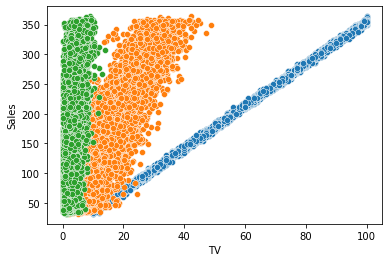

In [105]:
sns.scatterplot(x = df['TV'], y = df['Sales'])
sns.scatterplot(x = df['Radio'], y = df['Sales'])
sns.scatterplot(x = df['Social_Media'], y = df['Sales'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social_Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


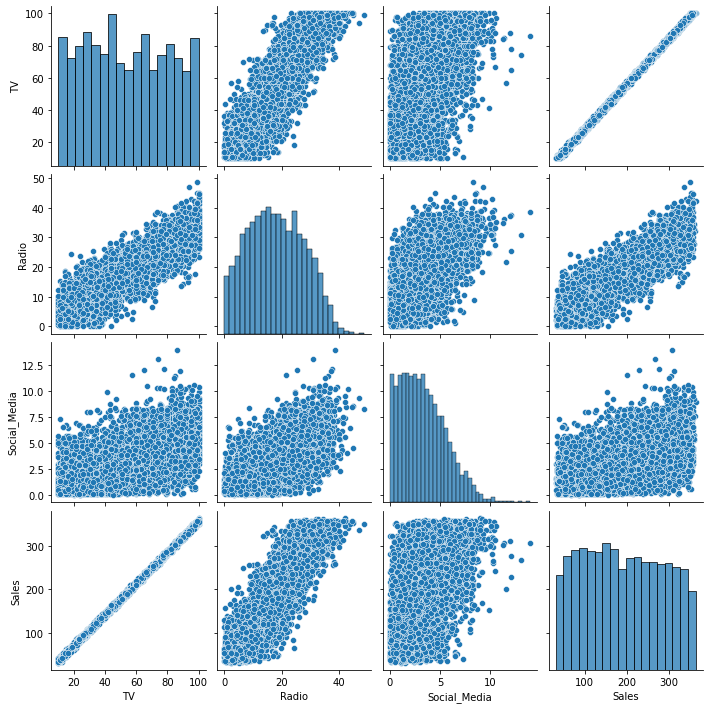

In [107]:
sns.pairplot(df)

In [108]:
#drop influencer column and label y
X = df.drop(['Influencer', 'Sales'], axis = 1)
X.head()

,TV,Radio,Social_Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998


In [109]:
y = df['Sales']

In [110]:
y.head()

0     54.732757
1     46.677897
2    150.177829
3    298.246340
4     56.594181
Name: Sales, dtype: float64

In [111]:
y.shape

(4546,)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [114]:
len(df)

4546

In [115]:
X_train.head()

,TV,Radio,Social_Media
1576,28.0,5.930538,0.861036
3453,52.0,14.790102,3.012858
1382,16.0,12.547868,2.389339
2843,73.0,22.361015,2.236350
1482,46.0,24.517573,1.461142


In [116]:
X_test.head()

,TV,Radio,Social_Media
497,15.0,3.518070,2.293790
3800,20.0,7.756876,2.572287
24,75.0,20.348988,1.227180
1918,55.0,20.108487,2.728374
142,77.0,31.653200,7.776978


In [117]:
len(X_test)

1364

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
model = LinearRegression()

In [120]:
model.fit(X_train, y_train)

LinearRegression()

In [121]:
test_predict = model.predict(X_test)
test_predict

array([ 53.17666145,  70.99619876, 267.03264136, ...,  53.1869741 ,
       124.48496704, 138.71321491])

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [123]:
mean_squared_error(y_test,test_predict)

8.669687044169898

In [131]:
np.sqrt(mean_squared_error(y_test,test_predict))

2.9444332297014135

In [132]:
test_residuals = y_test - test_predict

In [133]:
test_residuals

497     2.084623
3800   -3.421295
24      5.217466
1918   -0.628848
142    -0.045223
          ...   
4237    0.175961
3289   -3.192742
2665    0.713346
2977    2.740835
3613    6.995388
Name: Sales, Length: 1364, dtype: float64

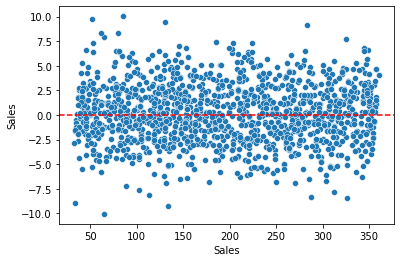

In [134]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red', ls='--')

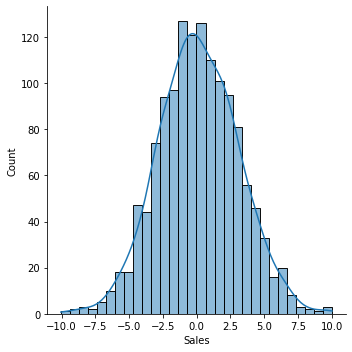

In [135]:
sns.displot(test_residuals, bins=30, kde=True)

In [136]:
import scipy as sp

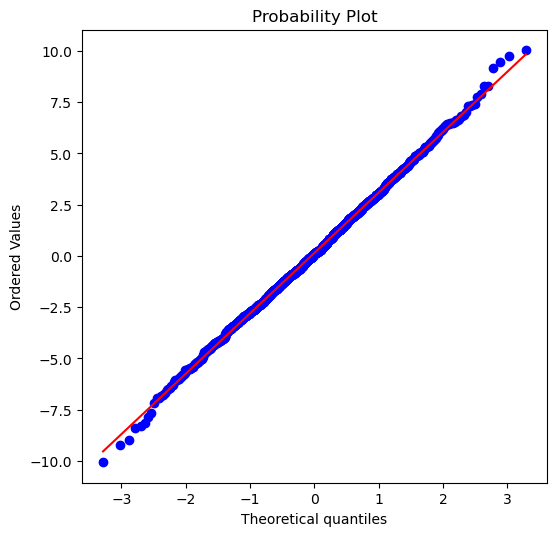

In [139]:
fig, ax = plt.subplots(figsize = (6,6), dpi=100)
_= sp.stats.probplot(test_residuals, plot=ax)

# Model Deployment

In [140]:
final_model = LinearRegression()

In [141]:
final_model.fit(X,y)

LinearRegression()

In [142]:
final_model.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

In [143]:
y_predict = final_model.predict(X)

Text(0.5, 0, 'Social_Media Spend')

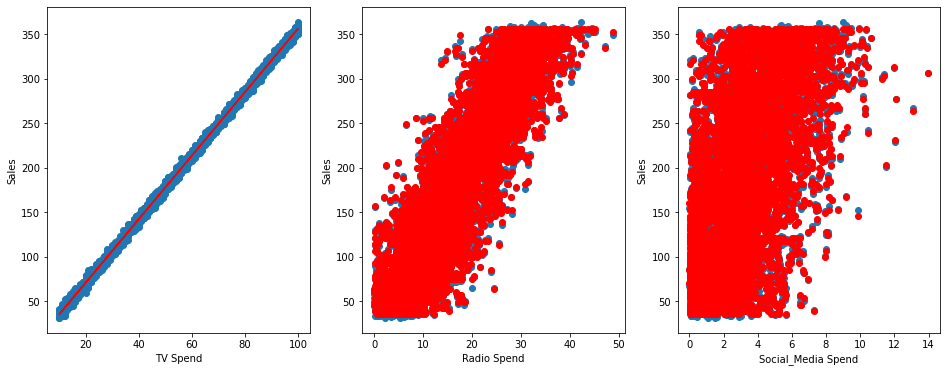

In [152]:
fig,axes = plt.subplots(nrows=1, ncols = 3, figsize = (16,6))
axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].plot(df['TV'], y_predict, color = 'red')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_predict, 'o', color = 'red')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['Social_Media'], df['Sales'], 'o')
axes[2].plot(df['Social_Media'], y_predict, 'o', color = 'red')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Social_Media Spend')

# Model Save for further deployment

In [153]:
from joblib import dump, load

In [155]:
dump(final_model, 'practice_linear_regression_1_model.joblib')

['practice_linear_regression_1_model.joblib']

In [156]:
loaded_model = load('practice_linear_regression_1_model.joblib')

In [157]:
loaded_model.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

In [165]:
# suppose run an advertisement where TV = 60, Radio = 66, Social_Media = 80
new_ad = [[60, 66, 80]]
feature_names = ['TV', 'Radio', 'Social_Media']
test_df = pd.DataFrame(new_ad, columns=feature_names)

In [167]:
test_df

,TV,Radio,Social_Media
0,60,66,80


In [169]:
#predict Sales for the X
loaded_model.predict(test_df)

array([213.75529049])